In [2]:
# muat publik dataset
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 7s 1us/step
x_train.shape: (60000, 28, 28)


In [6]:
# Membuat model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #flatten untuk merubah dari matriks yang ada di pooling layer menjadi satu kolom saja (sebuah vektor tunggal).
    tf.keras.layers.Dense(128, activation='relu'), #Aktivasi ReLU (Rectified Linear Unit) merupakan lapisan aktivasi pada model CNN yang mengaplikasikan fungsi f(x)=max(0,x)
    tf.keras.layers.Dropout(0.2), # menonaktifkan beberapa neuron secara rendom yang tidak diperlukan
    tf.keras.layers.Dense(128, activation='softmax') #aktivasi fungsi multiclass
])

In [7]:
# compile model
model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy", #without one hot encoding
             metrics=['accuracy'])

In [8]:
#Training model
train = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 0.3446 - accuracy: 0.9023 - val_loss: 0.1551 - val_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1552 - accuracy: 0.9538 - val_loss: 0.1115 - val_accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1158 - accuracy: 0.9645 - val_loss: 0.0906 - val_accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0919 - accuracy: 0.9723 - val_loss: 0.0800 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0795 - accuracy: 0.9754 - val_loss: 0.0788 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0686 - accuracy: 0.9779 - val_loss: 0.0753 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0617 - accuracy: 0.9803 - val_loss: 0.0716 - val_ac

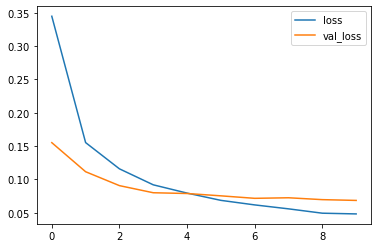

In [9]:
# visualisasi loss per iterasi
import matplotlib.pyplot as plt
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label='val_loss')
plt.legend()

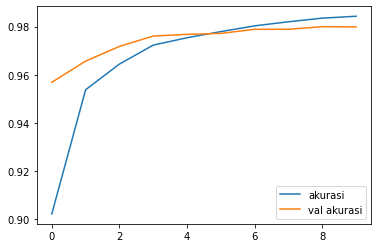

In [11]:
# Visualisasi akurasi per iterasi 
plt.plot(train.history['accuracy'], label='akurasi')
plt.plot(train.history['val_accuracy'], label='val akurasi')
plt.legend()

In [12]:
# evaluasi model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.0685 - accuracy: 0.9799
[0.06847133487462997, 0.9799000024795532]


Confusion Matrix, without normalization
[[ 970    1    2    1    1    0    2    1    2    0]
 [   0 1129    2    1    0    0    1    0    2    0]
 [   2    3 1012    0    2    0    2    5    5    1]
 [   0    0    2  994    0    6    0    3    3    2]
 [   1    0    3    0  965    0    2    1    1    9]
 [   2    1    0    9    2  869    4    1    4    0]
 [   3    3    1    1    2    4  941    0    3    0]
 [   3    7   11    2    2    0    0  996    2    5]
 [   4    2    5    3    2    3    0    3  950    2]
 [   3    5    0   10   10    2    0    3    3  973]]


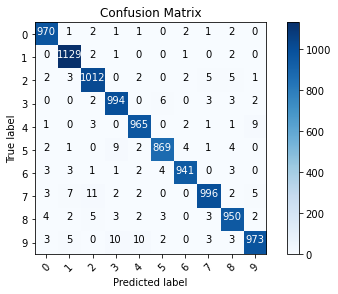

In [23]:
# plot confussion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, without normalization")

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                            plt.text(j, i, format(cm[i, j], fmt), 
                                horizontalalignment="center",
                                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
    

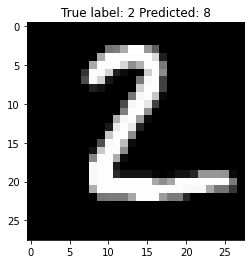

In [37]:
# menampilkan contoh beberapa misklasifikasi
misclassified_idx = np.where(p_test != y_test)[0] # mencari yang tidak sama
i = np.random.choice(misclassified_idx) #memilih secara random
plt.imshow(x_test[1], cmap='gray') #visualisasi
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));